In [1]:
import numpy as np

In [216]:
class LogisticRegression:
    
    def __init__(self, eta = 0.1, max_iter = 5000):
        self.eta = eta
        self.max_iter = max_iter


    def fit(self, X, y):

        self.d = X.shape[1]

        np.random.seed(42)
        
        # Generating random weights
        theta = np.random.rand(self.d)

        for i in range(self.max_iter):
            
            grad = np.zeros(self.d)

            for j in range(len(X)):
                
                x = X[j]
                y_curr = y[j]

                t = x @ theta

                # Sigmoid Function
                p = 1 / (1 + np.exp(-t, dtype=np.double))

                op = int(p >= 0.5)
                grad += (op - y_curr) * x
            
            # Updating weights
            theta = theta - self.eta * grad
        
        # Final weights
        self.w_est = theta

        return self
    
    def predict(self, X):
        if self.d != X.shape[1]:
            raise ValueError('Number of Columns in X must be {}'.format(self.d))
        predictions = []
        for x in X:
            t  = x @ self.w_est
            # Sigmoid Function
            p = 1 / (1 + np.exp(-t))
            predictions.append(p >= 0.5)
        return np.array(predictions)

Creating a Sample Dataset

In [276]:
# Red Class Points
X = np.array([[1, 1], [1, 2], [2, 1], [2, 2], [3, 2], [3, 3], [4, 3], [4, 4], [5, 3], [5, 4], [6, 4], [6, 5], [7, 4], [7, 5], [8, 5], [8, 6], [9, 5], [9, 6], [10, 6], [10, 7], [11, 6], [11, 7], [12, 7], [12, 8], [13, 7], [13, 8], [14, 8], [14, 9], [15, 8], [15, 9], [16, 9], [16, 10], [17, 9], [17, 10], [18, 10], [18, 11], [19, 10], [19, 11], [20, 11], [20, 12], [21, 11], [21, 12], [22, 12], [22, 13], [23, 12], [23, 13], [24, 13], [24, 14], [25, 13], [25, 14], [26, 14], [26, 15], [27, 14], [27, 15], [28, 15], [28, 16], [29, 15], [29, 16], [30, 16], [30, 17], [31, 16], [31, 17], [32, 17], [32, 18], [33, 17], [33, 18], [34, 18], [34, 19], [35, 18], [35, 19], [36, 19], [36, 20], [37, 19], [37, 20], [38, 20], [38, 21], [39, 20], [39, 21], [40, 21], [40, 22], [41, 21], [41, 22], [42, 22], [42, 23], [43, 22], [43, 23], [44, 23], [44, 24], [45, 23], [45, 24], [46, 24]])

# Blue Class Points are Red Class shifted vertically by 5
Y = []
for i in range(len(X)):
    Y.append([X[i][0], X[i][1] + 5])
Y = np.array(Y)


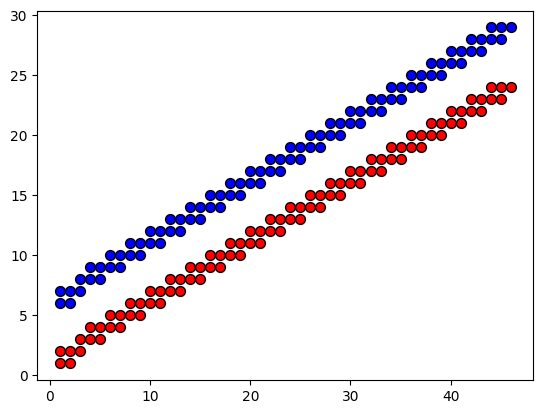

In [293]:

# Plotting the points
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], color = 'red', marker='o', s=50, edgecolor='k')
plt.scatter(Y[:, 0], Y[:, 1], color = 'blue', marker='o', s=50, edgecolor='k')
plt.show()

In [263]:
# Training Model
model = LogisticRegression()

In [278]:
X_total = np.concatenate((X, Y))
y_total = np.concatenate((np.ones(X.shape[0]), np.zeros(Y.shape[0])))

# Convert to DataFrame
import pandas as pd
df_x = pd.DataFrame(X_total, columns = ['x1', 'x2'])
df_x['ones'] = np.ones(X_total.shape[0])
df_y = pd.DataFrame(y_total, columns = ['y'])

In [279]:
len(df_x), len(df_y)

(182, 182)

## Cross Validation Function

In [280]:
# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# Import confusion matrix, accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

def cross_validate(model, X, y, cv=2):

    # Let's split data into 10 folds with stratisfied sampling
    kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=0)

    # Let's create a dictionary to store the scores
    scores = {}
    
    # Let's iterate over the folds
    i = 1
    for train_index, test_index in kf.split(X, y):
        
        # Let's split the data into train and test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Let's fit the model
        print('Training Fold {}'.format(i))
        print('----------------')
        print('X_train: ', X_train.shape)
        print('y_train: ', y_train.shape)

        model.fit(X_train.values, y_train.values)
        
        # Let's predict the test data
        y_pred = model.predict(X_test.values)
        
        # Let's calculate the accuracy score
        acc = accuracy_score(y_test, y_pred)

        # Let's calculate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Let's append the score to the list
        scores[f'Fold-{i}'] = {'accuracy': acc, 'confusion_matrix': cm}
        i += 1

    # Let's return the scores
    return scores

Cross Validating

In [281]:
# Let's cross validate the model
scores = cross_validate(model, df_x, df_y, cv=5)

Training Fold 1
----------------
X_train:  (145, 3)
y_train:  (145, 1)


C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:29: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t, dtype=np.double))
C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:49: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t))
C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:29: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t, dtype=np.double))


Training Fold 2
----------------
X_train:  (145, 3)
y_train:  (145, 1)


C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:49: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t))
C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:29: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t, dtype=np.double))


Training Fold 3
----------------
X_train:  (146, 3)
y_train:  (146, 1)


C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:49: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t))
C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:29: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t, dtype=np.double))


Training Fold 4
----------------
X_train:  (146, 3)
y_train:  (146, 1)


C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:49: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t))
C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:29: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t, dtype=np.double))


Training Fold 5
----------------
X_train:  (146, 3)
y_train:  (146, 1)


C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:49: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t))


In [282]:
for i in scores:
    print('Fold: ', i)
    print('Accuracy: ', scores[i]['accuracy'])
    print('Confusion Matrix: ', scores[i]['confusion_matrix'])
    print('----------------')

Fold:  Fold-1
Accuracy:  1.0
Confusion Matrix:  [[18  0]
 [ 0 19]]
----------------
Fold:  Fold-2
Accuracy:  1.0
Confusion Matrix:  [[19  0]
 [ 0 18]]
----------------
Fold:  Fold-3
Accuracy:  0.9444444444444444
Confusion Matrix:  [[17  1]
 [ 1 17]]
----------------
Fold:  Fold-4
Accuracy:  1.0
Confusion Matrix:  [[18  0]
 [ 0 18]]
----------------
Fold:  Fold-5
Accuracy:  1.0
Confusion Matrix:  [[18  0]
 [ 0 18]]
----------------


In [283]:
# Training Data on the whole dataset
model = LogisticRegression()
model.fit(df_x.values, df_y.values)

C:\Users\ishikaj\AppData\Local\Temp\ipykernel_9008\1252405512.py:29: RuntimeWarning: overflow encountered in exp
  p = 1 / (1 + np.exp(-t, dtype=np.double))


In [284]:
model.w_est

array([ 269.77454012, -461.04928569,  765.73199394])

### Plotting the Results

In [287]:
# Plot the line formed by W_est
line_x = np.linspace(0, 50, 100)
# Line is: w0 + w1*x1 + w2*y = 0
# y = -(w0 + w1*x1)/w2
line_y = -(model.w_est[0] + model.w_est[1]*line_x)/model.w_est[2]

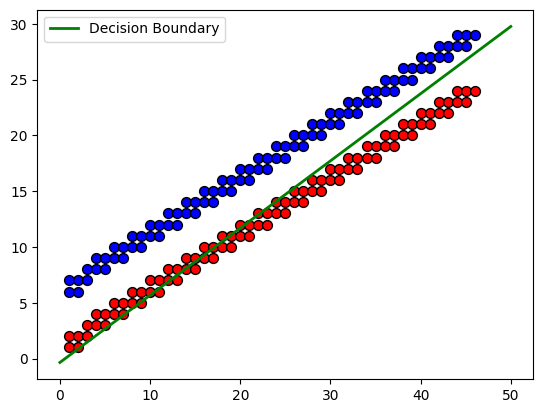

In [302]:
plt.scatter(X[:, 0], X[:, 1], color = 'red', marker='o', s=50, edgecolor='k')
plt.scatter(Y[:, 0], Y[:, 1], color = 'blue', marker='o', s=50, edgecolor='k')
plt.plot(line_x, line_y, color = 'green', linewidth=2, linestyle='-', label='Decision Boundary')
plt.legend()
plt.show()